In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [2]:
data = pd.read_csv('csv/TSLA.timeseries.csv', date_parser = True)
data.tail()

,date,open,high,low,close,volume,adjclose
2387,2010-07-06,20.000000,20.00,15.830000,16.110001,6866900,16.110001
2388,2010-07-02,23.000000,23.10,18.709999,19.200001,5139800,19.200001
2389,2010-07-01,25.000000,25.92,20.270000,21.959999,8218800,21.959999
2390,2010-06-30,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2391,2010-06-29,19.000000,25.00,17.540001,23.889999,18766300,23.889999


In [3]:
data_training = data[data['date'] < '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_training

,date,open,high,low,close,volume,adjclose
2391,2010-06-29,19.000000,25.000000,17.540001,23.889999,18766300,23.889999
2390,2010-06-30,25.790001,30.420000,23.299999,23.830000,17187100,23.830000
2389,2010-07-01,25.000000,25.920000,20.270000,21.959999,8218800,21.959999
2388,2010-07-02,23.000000,23.100000,18.709999,19.200001,5139800,19.200001
2387,2010-07-06,20.000000,20.000000,15.830000,16.110001,6866900,16.110001
2386,2010-07-07,16.400000,16.629999,14.980000,15.800000,6921700,15.800000
2385,2010-07-08,16.139999,17.520000,15.570000,17.459999,7711400,17.459999
2384,2010-07-09,17.580000,17.900000,16.549999,17.400000,4050600,17.400000
2383,2010-07-12,17.950001,18.070000,17.000000,17.049999,2202500,17.049999
2382,2010-07-13,17.389999,18.639999,16.900000,18.139999,2680100,18.139999


In [4]:
data_test = data[data['date'] >= '2019-01-01'].sort_values(by='date', ascending=True).copy()
data_test

,date,open,high,low,close,volume,adjclose
249,2019-01-02,306.100006,315.130005,298.799988,310.119995,11658600,310.119995
248,2019-01-03,307.000000,309.399994,297.380005,300.359985,6965200,300.359985
247,2019-01-04,306.000000,318.000000,302.730011,317.690002,7394100,317.690002
246,2019-01-07,321.720001,336.739990,317.750000,334.959991,7551200,334.959991
245,2019-01-08,341.959991,344.010010,327.019989,335.350006,7008500,335.350006
244,2019-01-09,335.500000,343.500000,331.470001,338.529999,5432900,338.529999
243,2019-01-10,334.399994,345.390015,331.790009,344.970001,6056400,344.970001
242,2019-01-11,342.089996,348.410004,338.769989,347.260010,5039100,347.260010
241,2019-01-14,342.380005,342.500000,334.000000,334.399994,5247300,334.399994
240,2019-01-15,335.000000,348.799988,334.500000,344.429993,6056600,344.429993


In [5]:
training_data = data_training.drop(['date', 'adjclose'], axis = 1)
training_data.head()

,open,high,low,close,volume
2391,19.000000,25.00,17.540001,23.889999,18766300
2390,25.790001,30.42,23.299999,23.830000,17187100
2389,25.000000,25.92,20.270000,21.959999,8218800
2388,23.000000,23.10,18.709999,19.200001,5139800
2387,20.000000,20.00,15.830000,16.110001,6866900


In [6]:
scaler = MinMaxScaler()
training_data = scaler.fit_transform(training_data)
training_data

array([[0.00771826, 0.02244088, 0.00702583, 0.02191224, 0.50337694],
       [0.02604237, 0.0369725 , 0.02283393, 0.02174973, 0.46074816],
       [0.0239104 , 0.02490751, 0.01451821, 0.01668472, 0.21865873],
       ...,
       [0.81959248, 0.81918608, 0.78634354, 0.81346155, 0.22827666],
       [0.82839024, 0.85690923, 0.83275242, 0.86151136, 0.26509364],
       [0.86803402, 0.86487212, 0.85155201, 0.85861318, 0.16692491]])

In [7]:
x_train = []
y_train = []

In [8]:
training_data.shape[0]

2142

In [9]:
for i in range(60, training_data.shape[0]):
    x_train.append(training_data[i-60:i])
    y_train.append(training_data[i, 0])

In [10]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
x_train.shape, y_train.shape

((2082, 60, 5), (2082,))

In [12]:
### Building LSTM

In [13]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout

Using Theano backend.


In [14]:
regressior = Sequential()

regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1], 5)))
regressior.add(Dropout(0.2))
               
regressior.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
regressior.add(Dropout(0.2))

regressior.add(LSTM(units = 120, activation = 'relu'))
regressior.add(Dropout(0.2))

regressior.add(Dense(units = 1))

In [15]:
regressior.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 60, 60)            15840     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 120)               96480     
__________

In [16]:
regressior.compile(optimizer='sgd', metrics=['mae', 'acc'], loss = 'mean_squared_error')

In [17]:
regressior.fit(x_train, y_train, epochs=10, batch_size=32)

C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not avai

Epoch 1/10
2082/2082 [==============================] - 23s 11ms/step - loss: 0.1337 - mean_absolute_error: 0.3133 - acc: 0.0000e+00
Epoch 2/10
2082/2082 [==============================] - 24s 12ms/step - loss: 0.0878 - mean_absolute_error: 0.2602 - acc: 0.0000e+00
Epoch 3/10
2082/2082 [==============================] - 24s 12ms/step - loss: 0.0846 - mean_absolute_error: 0.2545 - acc: 0.0000e+00
Epoch 4/10
2082/2082 [==============================] - 23s 11ms/step - loss: 0.0823 - mean_absolute_error: 0.2507 - acc: 0.0000e+00
Epoch 5/10
2082/2082 [==============================] - 22s 10ms/step - loss: 0.0774 - mean_absolute_error: 0.2425 - acc: 0.0000e+00
Epoch 6/10
2082/2082 [==============================] - 23s 11ms/step - loss: 0.0719 - mean_absolute_error: 0.2322 - acc: 0.0000e+00
Epoch 7/10
2082/2082 [==============================] - 23s 11ms/step - loss: 0.0638 - mean_absolute_error: 0.2179 - acc: 4.8031e-04
Epoch 8/10
2082/2082 [==============================] - 23s 11ms/step

In [18]:
### Prepare test dataset

In [19]:
data_test.tail()

,date,open,high,low,close,volume,adjclose
4,2019-12-20,410.290009,413.000000,400.190002,405.589996,14752700,405.589996
3,2019-12-23,411.779999,422.010010,410.000000,419.220001,13319600,419.220001
2,2019-12-24,418.359985,425.470001,412.690002,425.250000,8054700,425.250000
1,2019-12-26,427.910004,433.480011,426.350006,430.940002,10633900,430.940002
0,2019-12-27,435.000000,435.309998,426.109985,430.380005,9945700,430.380005


In [20]:
data_training.tail(60)

,date,open,high,low,close,volume,adjclose
309,2018-10-04,293.950012,294.000000,277.670013,281.829987,9814200,281.829987
308,2018-10-05,274.649994,274.880005,260.000000,261.950012,17944500,261.950012
307,2018-10-08,264.519989,267.760010,249.000000,250.559998,13472700,250.559998
306,2018-10-09,255.250000,266.769989,253.300003,262.799988,12060600,262.799988
305,2018-10-10,264.609985,265.510010,247.770004,256.880005,12815300,256.880005
304,2018-10-11,257.529999,262.250000,249.029999,252.229996,8167700,252.229996
303,2018-10-12,261.000000,261.989990,252.009995,258.779999,7201400,258.779999
302,2018-10-15,259.059998,263.279999,254.539993,259.589996,6200000,259.589996
301,2018-10-16,265.700012,277.380005,262.239990,276.589996,9526400,276.589996
300,2018-10-17,282.399994,282.700012,265.799988,271.779999,8655500,271.779999


In [21]:
past_60_days = data_training.tail(60)

In [22]:
df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['date', 'adjclose'], axis = 1)
df.head()

,open,high,low,close,volume
0,293.950012,294.000000,277.670013,281.829987,9814200
1,274.649994,274.880005,260.000000,261.950012,17944500
2,264.519989,267.760010,249.000000,250.559998,13472700
3,255.250000,266.769989,253.300003,262.799988,12060600
4,264.609985,265.510010,247.770004,256.880005,12815300


In [23]:
inputs = scaler.transform(df)
inputs

array([[0.74972341, 0.74365921, 0.72094302, 0.72055793, 0.2617248 ],
       [0.69763862, 0.69239642, 0.67244832, 0.66671184, 0.48119335],
       [0.67030087, 0.67330693, 0.64225923, 0.63586131, 0.360482  ],
       ...,
       [1.0854675 , 1.09614461, 1.09150039, 1.1090195 , 0.21422903],
       [1.11124005, 1.11762032, 1.12898976, 1.12443121, 0.28385171],
       [1.13037376, 1.12252671, 1.12833103, 1.12291442, 0.2652745 ]])

In [24]:
x_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])

In [25]:
x_test, y_test = np.array(x_test),np.array(y_test)
x_test.shape, y_test.shape

((250, 60, 5), (250,))

In [26]:
y_pred = regressior.predict(x_test)

C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not available. This donot happen normally. You are probably in a strangesetup. This mean Theano can not use the cython code for scan. If youwant to remove this warning, use the Theano flag'cxx=' (set to an empty string) to disable all ccode generation.
  "The file scan_perform.c is not available. This do"
C:\Users\reggl\Anaconda3\lib\site-packages\theano\scan_module\scan_perform_ext.py:76: UserWarning: The file scan_perform.c is not avai

In [27]:
scaler.scale_

array([2.69869111e-03, 2.68110901e-03, 2.74446300e-03, 2.70855905e-03,
       2.69939048e-08])

In [28]:
scale = 1/2.69869111e-03
scale

370.55000340516926

In [29]:
y_pred = y_pred*scale
y_test = y_test*scale

In [30]:
### Visualize Data 

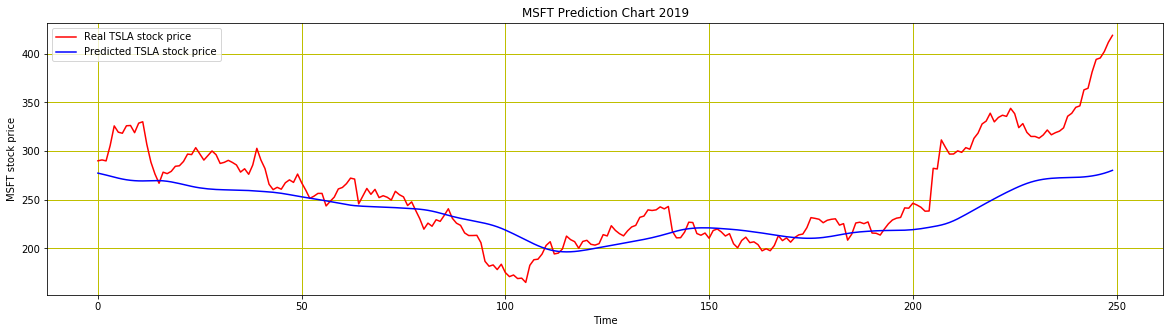

In [31]:
plt.figure(figsize=(20,5))
plt.plot(y_test, color = 'red', label = 'Real TSLA stock price')
plt.plot(y_pred, color = 'blue', label = 'Predicted TSLA stock price')
plt.title('TSLA Prediction Chart 2019')
plt.grid(color='y', linestyle='-', linewidth=1)
plt.xlabel('Time')
plt.ylabel('TSLA price')
plt.legend()
plt.show()